# Keras Classification (continue)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('../DATA/cancer_classification.csv')

# Part 2: Feature Engineering, Train Test Split, Scale data

**TARGET**: benign_0__mal_1

**NOTE**: Remeber to add .values to have them in numpy form

In [62]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scale Data **AFTER** the split

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3: Creating the model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [69]:
X_train.shape

(426, 30)

30 Neurons on first layer (input layer)

In [32]:
model = Sequential()

model.add(Dense(30,'relu')) # 1st layer (INPUT)
model.add(Dense(15,'relu')) # 2nd layer

#Last layer, one neuron and SIGMOID (BINARY CLASSIFICATION)
model.add(Dense(1,'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

### Train model, first too many epochs in order to **overfit**

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test)
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 6ms/sample - loss: 0.6828 - val_loss: 0.6600
Epoch 2/600
426/426 [==============================] - 0s 462us/sample - loss: 0.6435 - val_loss: 0.6227
Epoch 3/600
426/426 [==============================] - 0s 478us/sample - loss: 0.6009 - val_loss: 0.5812
Epoch 4/600
426/426 [==============================] - 0s 456us/sample - loss: 0.5574 - val_loss: 0.5325
Epoch 5/600
426/426 [==============================] - 0s 353us/sample - loss: 0.5094 - val_loss: 0.4823
Epoch 6/600
426/426 [==============================] - 0s 350us/sample - loss: 0.4599 - val_loss: 0.4307
Epoch 7/600
426/426 [==============================] - 0s 356us/sample - loss: 0.4120 - val_loss: 0.3821
Epoch 8/600
426/426 [==============================] - 0s 350us/sample - loss: 0.3678 - val_loss: 0.3387
Epoch 9/600
426/426 [==============================] - 0s 392us/sample - loss: 0.3294 - val_loss: 0.3003
Epoch 10/60

Plotting the losses, is clearly an overfitting case:

in the begining both validation and training loss are decreasing, that's good.

However at certain time the validation loss diverges, that's an indicator that we trainend with **too many EPOCHS**, the val_loss get worst and worst after those many epochs

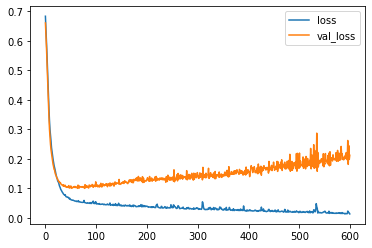

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Early Stopping

Now, we're going to see if we can use **early stopping**:

Based on validation loss, stop the training before it gets out of hand.

Creating the model again:

In [39]:
model = Sequential()

model.add(Dense(30,'relu')) # 1st layer (INPUT)
model.add(Dense(15,'relu')) # 2nd layer

#Last layer, one neuron and SIGMOID (BINARY CLASSIFICATION)
model.add(Dense(1,'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

Callbacks for early stopping

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
EarlyStopping?

Init signature:
EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Docstring:     
Stop training when a monitored quantity has stopped improving.

Arguments:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored quantity
        to qualify as an improvement, i.e. an absolute
        change of less than min_delta, will count as no
        improvement.
    patience: Number of epochs with no improvement
        after which training will be stopped.
    verbose: verbosity mode.
    mode: One of `{"auto", "min", "max"}`. In `min` mode,
        training will stop when the quantity
        monitored has stopped decreasing; in `max`
        mode it will stop when the quantity
        monitored has stopped increasing; in `auto`
        mode, the direction is automatically inferred
        from the name of the monitored quantity.
    baseline: Baseline value f

**Mode**: for accuracy we want to MAX that, for loss we want to MIN that.

Verbose to have a report back

patience, we wait 25 epochs even after detect one stopping point, because of noise

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',patience=25, verbose=1)

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 8ms/sample - loss: 0.6937 - val_loss: 0.6704
Epoch 2/600
426/426 [==============================] - 0s 462us/sample - loss: 0.6537 - val_loss: 0.6375
Epoch 3/600
426/426 [==============================] - 0s 404us/sample - loss: 0.6179 - val_loss: 0.5991
Epoch 4/600
426/426 [==============================] - 0s 488us/sample - loss: 0.5744 - val_loss: 0.5510
Epoch 5/600
426/426 [==============================] - 0s 408us/sample - loss: 0.5251 - val_loss: 0.4979
Epoch 6/600
426/426 [==============================] - 0s 388us/sample - loss: 0.4698 - val_loss: 0.4381
Epoch 7/600
426/426 [==============================] - 0s 470us/sample - loss: 0.4143 - val_loss: 0.3825
Epoch 8/600
426/426 [==============================] - ETA: 0s - loss: 0.365 - 0s 568us/sample - loss: 0.3629 - val_loss: 0.3310
Epoch 9/600
426/426 [==============================] - 0s 500us/sample - loss: 0.3210 - val_

#### The advantage of the eraly stop is that we can choose any large trivial epoch number and the early stopp tells the model when to stop :D

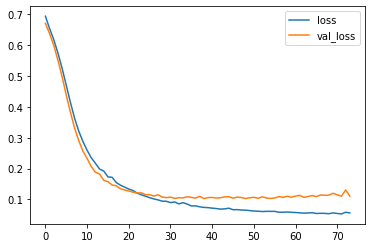

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Third thing to do for trying to prevent overfitting:

## Dropout Layers

**Dropout Layers**: Turn off percentage of neurons randomly

In [70]:
from tensorflow.keras.layers import Dropout

In [71]:
model = Sequential()

model.add(Dense(30,'relu')) # 1st layer (INPUT)
#DROPOUT: rate - probability for turn off neuron, 50%
model.add(Dropout(rate=0.5))

model.add(Dense(15,'relu')) # 2nd layer
model.add(Dropout(rate=0.5))

#Last layer, one neuron and SIGMOID (BINARY CLASSIFICATION)
model.add(Dense(1,'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',patience=25, verbose=1)

In [73]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 7ms/sample - loss: 0.6951 - val_loss: 0.6737
Epoch 2/600
426/426 [==============================] - 0s 378us/sample - loss: 0.6843 - val_loss: 0.6579
Epoch 3/600
426/426 [==============================] - 0s 390us/sample - loss: 0.6520 - val_loss: 0.6420
Epoch 4/600
426/426 [==============================] - 0s 385us/sample - loss: 0.6542 - val_loss: 0.6273
Epoch 5/600
426/426 [==============================] - 0s 390us/sample - loss: 0.6406 - val_loss: 0.6075
Epoch 6/600
426/426 [==============================] - 0s 441us/sample - loss: 0.6145 - val_loss: 0.5796
Epoch 7/600
426/426 [==============================] - 0s 453us/sample - loss: 0.6130 - val_loss: 0.5533
Epoch 8/600
426/426 [==============================] - 0s 354us/sample - loss: 0.5964 - val_loss: 0.5366
Epoch 9/600
426/426 [==============================] - 0s 354us/sample - loss: 0.5459 - val_loss: 0.5040
Epoch 10/60

#### This is even better performance!

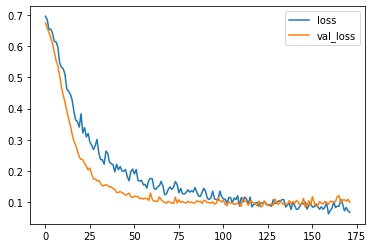

In [74]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Full evaluation of classes

We are doing a classification task, we're trying whether a tumor based on its features ir bening or malignant

In [75]:
preds = model.predict_classes(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test, preds))
print("")
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


[[54  1]
 [ 2 86]]
